# K-means

Maria Jose Castro Lemus, 181202

Diana Ximena de Leon Figueroa, 18607

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

plt.rcParams["figure.figsize"] = (8, 5)

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,.text,.text_virtual_address,.text_virtual_size,.text_size_raw_data,.rdata,.rdata_virtual_address,.rdata_virtual_size,.rdata_size_raw_data,.data,.data_virtual_address,...,b'_aullshr',b'_allmul',b'_allshl',b'_alldiv',b'_chkstk',b'_aulldiv',b'RtlUnwind',b'listen',b'bind',b'accept'
0,1,4096,3382,3584,1,8192,1308,1536,1,12288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4096,3382,3584,1,8192,1308,1536,1,12288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,4096,9690,9728,1,16384,2596,3072,1,20480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4096,9690,9728,1,16384,2596,3072,1,20480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,4096,3702,4096,1,8192,1662,2048,1,12288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 378 entries, .text to b'accept'
dtypes: float64(356), int64(22)
memory usage: 118.2 KB


In [5]:
df.fillna(value = 0, inplace = True)

In [6]:
for column in df.columns.values:
    df[column] = df[column].astype(int)
    if len(df[column].unique()) == 2:
        df[column] = df[column].astype('category')

In [7]:
df.dtypes

.text                       int32
.text_virtual_address       int32
.text_virtual_size          int32
.text_size_raw_data         int32
.rdata                      int32
                           ...   
b'_aulldiv'              category
b'RtlUnwind'             category
b'listen'                category
b'bind'                  category
b'accept'                category
Length: 378, dtype: object

In [8]:
df.head()

,.text,.text_virtual_address,.text_virtual_size,.text_size_raw_data,.rdata,.rdata_virtual_address,.rdata_virtual_size,.rdata_size_raw_data,.data,.data_virtual_address,...,b'_aullshr',b'_allmul',b'_allshl',b'_alldiv',b'_chkstk',b'_aulldiv',b'RtlUnwind',b'listen',b'bind',b'accept'
0,1,4096,3382,3584,1,8192,1308,1536,1,12288,...,0,0,0,0,0,0,0,0,0,0
1,1,4096,3382,3584,1,8192,1308,1536,1,12288,...,0,0,0,0,0,0,0,0,0,0
2,1,4096,9690,9728,1,16384,2596,3072,1,20480,...,0,0,0,0,0,0,0,0,0,0
3,1,4096,9690,9728,1,16384,2596,3072,1,20480,...,0,0,0,0,0,0,0,0,0,0
4,1,4096,3702,4096,1,8192,1662,2048,1,12288,...,0,0,0,0,0,0,0,0,0,0


In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [10]:
sil = []
kmax = 15

for k in range (2, kmax + 1):
  kmeans = KMeans(
        init = "random",
        n_clusters = k,
        n_init = 1,
        max_iter = 200,
        random_state = 123
    ).fit(X)
  etiquetas = kmeans.labels_
  sil.append(silhouette_score(X, etiquetas, metric = 'euclidean'))

In [11]:
print(sil)

[0.38858640286355345, 0.6753072234464613, 0.8020409121675096, 0.8697623588374155, 0.8516849521772372, 0.770675658902789, 0.8269255764781803, 0.8418227458221897, 0.8168228167687127, 0.7515295457851684, 0.8591896002485548, 0.9221297923141453, 0.8730834582869076, 0.848091947139574]


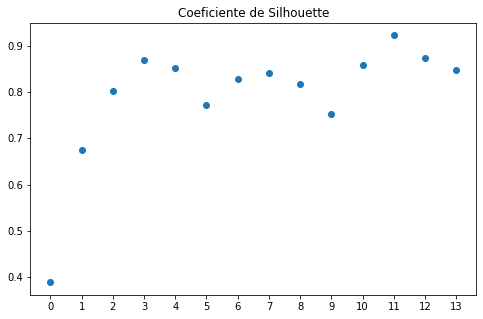

In [12]:
k = list(range(14))
plt.scatter(k, sil)
plt.title('Coeficiente de Silhouette')
plt.xticks(k, k)
plt.show()

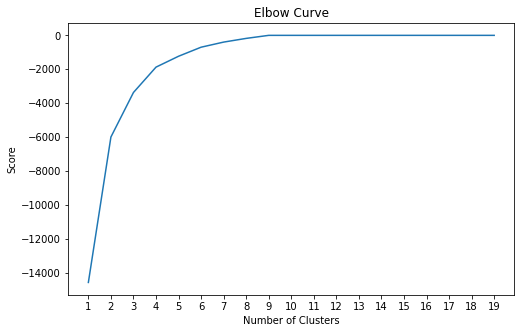

In [13]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(Nc, Nc)
plt.show()

In [14]:
clusters = DBSCAN(eps = 0.005, min_samples = 2).fit(X)

In [15]:
clusters.labels_

array([ 0,  0,  1,  1,  2, -1, -1,  3,  4,  5,  4,  6,  4,  1,  4,  1,  5,
        7,  4,  5,  0,  1,  8, -1,  5,  1,  6,  5,  5,  6,  8,  5,  3,  4,
        9,  2,  1,  9,  7,  9], dtype=int64)

* ¿Para qué número de clústeres se obtiene el coeficiente de sillhouete más alto? 11 clústeres 
* ¿Coincide con el método del codo? Es bastante similar, en la gráfica del método de codo se alcanza a observar que el número ideal está entre 9 y 10 clústeres
* ¿Cuántas familias existen entre los ejemplares de malware proporcionados? Se obtuvieron 10 familias, y tres de los malware no se encontraban entre ninguna de esas familias